# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

План работы и задачи:

- Изучить общую информацию о данных;

- Выполнить предобработку данных;

- Добавить в таблицу новые столбцы;

- Провести исследовательский анализ данных: 1. изучить параметры объектов и построить отдельные гистограммы для каждого из этих параметров. Обработать аномалии в столбцах, если они есть. 2. изучить как быстро продавались квартиры. 3. определить факторы, которые больше всего влияют на общую (полную) стоимость объекта. 4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 5.  ввычислить среднюю стоимость квартир на разном удалении от центра.

- Написать общий вывод.


<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

### Откройте файл с данными и изучите общую информацию

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

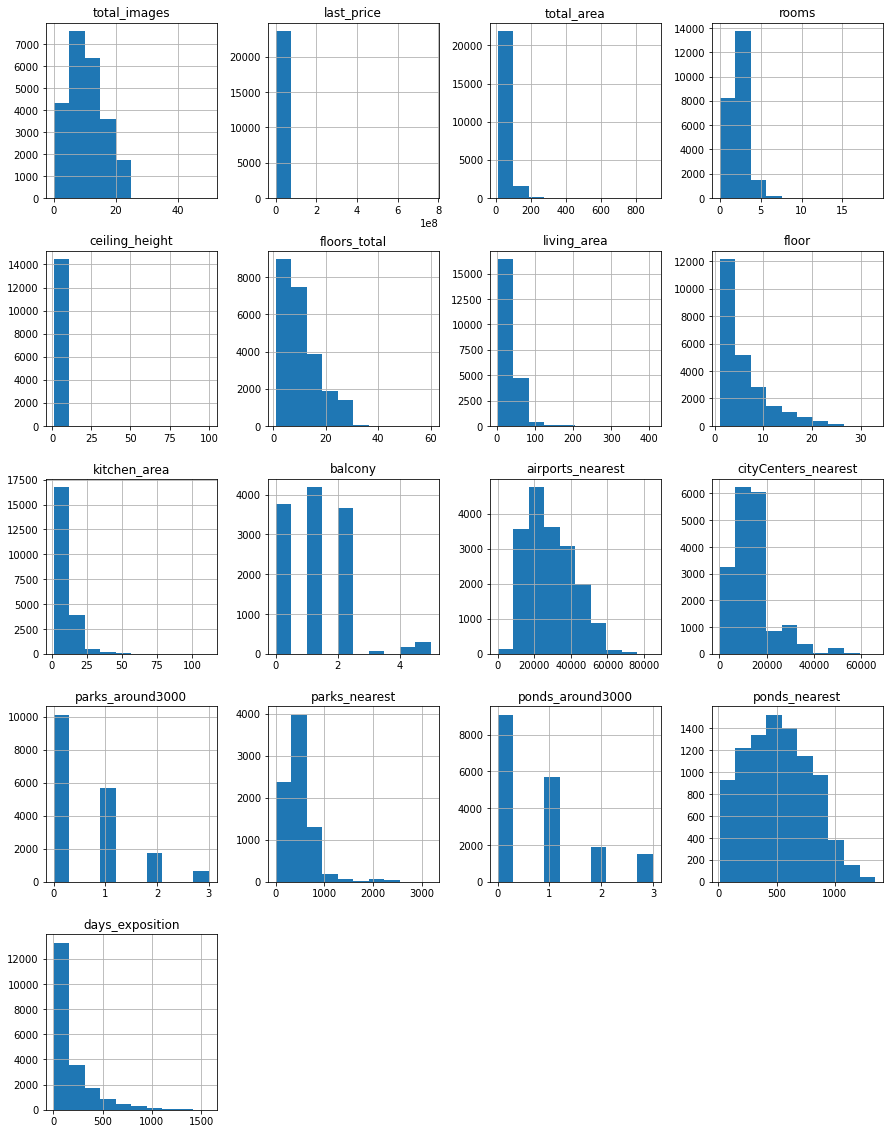

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()
data.hist(figsize=(15, 20));

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Скрыть служ. информацию поможет точка с запятой на посл. строке кода

    array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

data.hist(figsize=(15, 20));


Выводы: в данных есть пропуски, неверно обозначен тип данных для некоторых столбцов, данные нуждаются в предобработке.

### Выполните предобработку данных

In [2]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [5]:
# приведем в порядок названия столбцов
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )

In [6]:
# начнем проверять данные и пропуски с ceiling_height. Выведем список значений по убыванию 
data['ceiling_height'].sort_values(ascending=False).head(35)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
3474       8.0
17442      8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
12628      5.3
1026       5.3
Name: ceiling_height, dtype: float64

Даже в самых габаритных квартирах Санкт-Петербурга и пентхаусах потолки не могут быть выше 9 метров (источники: https://spb.realty.ru/article/chem_vyshe_klass_zhilya_tem_vyshe_potolok , https://asninfo.ru/comfortlive/210-samyye-bolshiye-kvartiry-sankt-peterburga). Возможно, со времени публикации статей на рынке Петербурга появились квартиры с потолками 14 и 10.3 метра, но потолки выше 20 м - потенциальная ошибка

In [7]:
# посмотрим на срез данных и изучим, в каких квартирах потолки были выше 20 метров
print(data[(data['ceiling_height']>20)])

       total_images  last_price  total_area first_day_exposition  rooms  \
355              17   3600000.0        55.2  2018-07-12T00:00:00      2   
3148             14   2900000.0        75.0  2018-11-12T00:00:00      3   
4643              0   4300000.0        45.0  2018-02-01T00:00:00      2   
4876              7   3000000.0        25.0  2017-09-27T00:00:00      0   
5076              0   3850000.0        30.5  2018-10-03T00:00:00      1   
5246              0   2500000.0        54.0  2017-10-13T00:00:00      2   
5669              4   4400000.0        50.0  2017-08-08T00:00:00      2   
5807             17   8150000.0        80.0  2019-01-09T00:00:00      2   
6246              6   3300000.0        44.4  2019-03-25T00:00:00      2   
9379              5   3950000.0        42.0  2017-03-26T00:00:00      3   
10773             8   3800000.0        58.0  2017-10-13T00:00:00      2   
11285             0   1950000.0        37.0  2019-03-20T00:00:00      1   
14382             9   170

Анализируя стоимость жилья и его локацию, можно предположить, что произошел перенос точки при вводе данных. Исправим ошибку

In [8]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].sort_values(ascending=False).head(35)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
3474      8.00
17442     8.00
15743     8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
19142     4.70
1300      4.70
12401     4.65
13224     4.50
9783      4.50
2823      4.50
14519     4.50
10159     4.50
3067      4.50
6802      4.50
7521      4.45
8018      4.45
7274      4.40
6728      4.40
11651     4.40
4201      4.37
10754     4.30
17078     4.25
Name: ceiling_height, dtype: float64

In [9]:
# заменим пропуски на медианные
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
# теперь рассмотрим данные и пропуски floors_total
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [11]:
# Попробуем изменить решение и учесть данные в столюце floor при заполнении пропусков в foors_total
def floors_total(row):
    if row['floors_total'] >= 0:
        return 0
    else:
        return data[data['floor'] == row['floor']]['floors_total'].median()
        
data['fl'] = data.apply(floors_total, axis=1) 
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = (data['fl'] + data['floors_total']).astype('int')
data.drop('fl', axis= 1 , inplace= True )
data['floors_total'].unique()


array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

In [12]:
# пропуски в living_area можно заменить на 0, ведь потенциально жилой зоны может и не быть
data['living_area'] = data['living_area'].fillna(0)

In [13]:
# check
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [14]:
# Попробуем изменить решение и учесть данные в столюце living_area при заполнении пропусков в is_apartment
def fill_apartments(row):
    if row['living_area'] == 0:
        return True
    else:
        return False

data['is_apartment'] = data.apply(fill_apartments, axis=1)
data['is_apartment'] = data['is_apartment'].astype(bool)

In [15]:
# check
data['is_apartment'].value_counts()

False    21796
True      1903
Name: is_apartment, dtype: int64

In [16]:
# пропуски в kitchen_area и balcony можно заменить на 0, ведь потенциально жилой зоны и балкона может и не быть
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

In [17]:
# рассмотрим данные и пропуски locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
# переведем в строчные буквы
data['locality_name'] = data['locality_name'].str.lower()

# уподобим названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ', 'городской ', 'городской поселок ', 'при железнодорожной станции ', 'платформа ', 
              'садоводческое некоммерческое товарищество ', 'коттеджный ', 'садовое товарищество ', 'станции ', 
              'село ', 'пансионат ', 'городского типа ', 'деревня '], '', regex=True)
)

# выведем значения в алфавитном порядке
set(data['locality_name'].unique())

{'69-й километр',
 nan,
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зеленый бор',
 'зимитицы',
 'ивангород',
 'изва

#### check name

In [19]:
# check
data.locality_name.nunique()

305

In [20]:
# пропуски заполним на unknown
data['locality_name'] = data['locality_name'].fillna('unknown')
# выведем значения в алфавитном порядке
set(data['locality_name'].unique())

{'69-й километр',
 'unknown',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зеленый бор',
 'зимитицы',
 'ивангород',


Пропуски в airports_nearest, city_centers_nearest, parks_nearest и ponds_nearest скорее всего, указывают,что объект находится далеко от аэропорта, центра города, прудов или парков соотвественно, можно не заполнять пропуски. А пропуски в parks_around3000 и ponds_around3000 можно заменить на 0

In [21]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Пропуски в days_exposition могут быть, если объявление еще размещено на сайте и объект недвижимости не продан, оставим без изменений. Проверим количество пропусков после обработки

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски данных могли возникнуть по разным причинам: ошибки при вводе информации вручную (например, при вводе данных в стоблец "населенный пункт"), слишком большое расстояние до объекта (автоматически расстояние до аэропорта или парка не определилось), отсутствие какой-то характеристики у объекта (например, нет балкона или кухни).

Были внесены изменения в тип данных is_apartment (булев тип). Изменим формат ячейки first_day_exposition, так как для данной ячейки больше подойдет формат daytime, и изменим формат ячейки rooms на int для дальнейшего анализа.

In [23]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [25]:
data['rooms'].astype('int')

0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23699, dtype: int64

In [26]:
# проверим, есть ли дубликаты
data.duplicated().sum()

0

Выводы: пропуски данных были заполнены и тип данных для некоторых столбцов был изменен. Теперь добавим некоторые столбцы, которые будут необходимы для дальнейшего анализа. 

### Добавьте в таблицу новые столбцы

In [27]:
# Добавим столбец price_meter с ценой одного квадратного метра объекта с точностью до двух знаков после запятой
data['price_meter'] = (data['last_price'] / data['total_area']).round(2)
# Добавим столбец day день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day'] = data['first_day_exposition'].dt.weekday 
# Добавим столбец month месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month 
# Добавим столбец year год публикации объявления
data['year'] = data['first_day_exposition'].dt.year 
# Добавим столбец type_floor тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(floor, axis=1) 
# Добавим столбец distance_city_center расстояние до центра города в километрах 
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,type_floor,distance_city_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,0.0,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Выводы: стоблцы добавлены и можно приступать к исследовательскому анализу данных.

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4"><b>🍕 Комментарий ревьюера в2</b></font>
    <br /> 
        <font size="3", color = "black">
            <br />
Можно без print(), если строка кода стоит последней
            
            print(data.head())

### Проведите исследовательский анализ данных

#### Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. 

До проведения исследования добавим фильтрацию данных для удаления аномалий (на основе графиков и данных, полученных ранее). У нас 23699 записи и фильтр не должен убирать более 1% записей за 1 столбец

In [28]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей, если удалить аномалии в rooms 
data_filtered_rooms = data.query('rooms >= 1 and rooms <= 7')
print(data_filtered_rooms['rooms'].count()*100/data['rooms'].count())


99.037934090046


Отфильтруем аномалию в столбце 'rooms' - оставим значения от 1 до 7 комнат

In [29]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'total_area'
data_filtered_area = data_filtered_rooms.query('total_area >= 20 and total_area <= 200')
print(data_filtered_area['total_area'].count()*100/data_filtered_rooms['total_area'].count())

99.07119423970005


In [30]:
# check
data_filtered_area.shape

(23253, 28)

Отфильтруем аномалию в столбце 'total_area' - оставим значения от 20 до 200 квадратных метров

In [31]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'ceiling_height'
data_filtered_ceiling = data_filtered_area.query('ceiling_height >= 2 and ceiling_height <= 4')
print(data_filtered_ceiling['ceiling_height'].count()*100/data_filtered_area['ceiling_height'].count())

99.81507762439256


In [32]:
# check
data_filtered_ceiling.shape

(23210, 28)

Отфильтруем аномалию в столбце 'ceiling_height' - оставим значения от 2 до 4 метров

#### check nan

In [33]:
# check
data_filtered_ceiling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23210 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23210 non-null  int64         
 1   last_price            23210 non-null  float64       
 2   total_area            23210 non-null  float64       
 3   first_day_exposition  23210 non-null  datetime64[ns]
 4   rooms                 23210 non-null  int64         
 5   ceiling_height        23210 non-null  float64       
 6   floors_total          23210 non-null  int64         
 7   living_area           23210 non-null  float64       
 8   floor                 23210 non-null  int64         
 9   is_apartment          23210 non-null  bool          
 10  studio                23210 non-null  bool          
 11  open_plan             23210 non-null  bool          
 12  kitchen_area          23210 non-null  float64       
 13  balcony         

In [34]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'days_exposition'
data_filtered_expo = data_filtered_ceiling.query('days_exposition >= 0 and days_exposition <= 1100 or days_exposition.isnull()')
print((data_filtered_expo['days_exposition'].count() * 100) / data_filtered_ceiling['days_exposition'].count())

99.21408674890569


Отфильтруем аномалию в столбце 'days_exposition' - оставим значения от 0 до 1100 дней

In [35]:
# check
data_filtered_expo.shape

(23052, 28)

In [36]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'last_price'
data_filtered_price = data_filtered_expo.query('last_price >= 500000 and last_price <= 27000000')
print(data_filtered_price['last_price'].count()*100/data_filtered_expo['last_price'].count())

98.9111573833073


In [37]:
# check
data_filtered_price.shape

(22801, 28)

Отфильтруем аномалию в столбце 'last_price' - оставим значения от 500000 до 27000000 рублей

In [38]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'living_area'
data_filtered_liv_area = data_filtered_price.query('living_area >= 0 and living_area <= 150')
print(data_filtered_liv_area['living_area'].count()*100/data_filtered_expo['last_price'].count())

98.89814332812772


Отфильтруем аномалию в столбце 'living_area' - оставим значения от 0 до 150 квадратных метров

In [39]:
# check
data_filtered_liv_area.shape

(22798, 28)

In [40]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'kitchen_area'
data_filtered_kitchen = data_filtered_liv_area.query('kitchen_area >= 0 and kitchen_area <= 35')
print(data_filtered_kitchen['kitchen_area'].count()*100/data_filtered_kitchen['kitchen_area'].count())

100.0


Отфильтруем аномалию в столбце 'kitchen_area' - оставим значения от 4 до 35 квадратных метров

In [41]:
# check
data_filtered_kitchen.shape

(22674, 28)

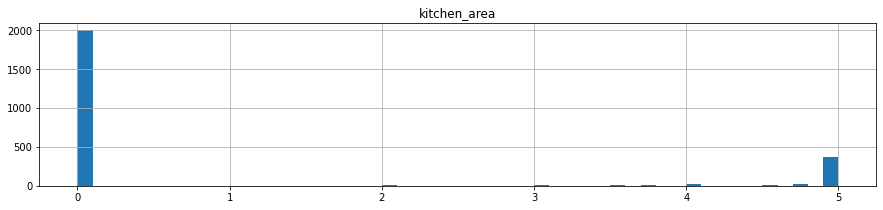

In [42]:
# check
data_filtered_kitchen.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [43]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'floor'
data_filtered_floor = data_filtered_kitchen.query('floor >= 1 and floor <= 30')
print(data_filtered_floor['floor'].count()*100/data_filtered_floor['floor'].count())

100.0


Отфильтруем аномалию в столбце 'floor' - оставим значения от 1 до 30

In [44]:
# посчитаем, сколько % будет составлять отфильтрованное количество записей по параметру 'floor_total'
data_filtered = data_filtered_floor.query('floors_total >= 1 and floors_total <= 30')
print(data_filtered['floors_total'].count()*100/data_filtered_floor['floors_total'].count())

99.88531604252128


Отфильтруем аномалию в столбце 'floors_total' - оставим значения от 1 до 30

In [45]:
#проверка того, сколько удалили
print(data_filtered['total_images'].count()*100/data['total_images'].count())

95.5525549601249


In [46]:
data_filtered.shape

(22645, 28)

In [47]:
# Анализ общей площади
data['total_area'].describe()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [48]:
# Анализ общей площади data_filtered
data_filtered['total_area'].describe()

count    22645.000000
mean        57.066374
std         24.250799
min         20.000000
25%         40.000000
50%         51.200000
75%         67.600000
max        200.000000
Name: total_area, dtype: float64

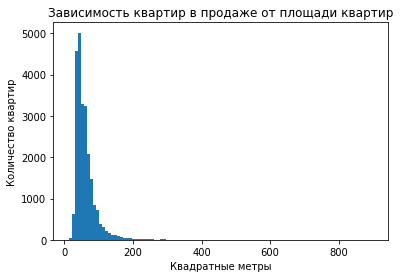

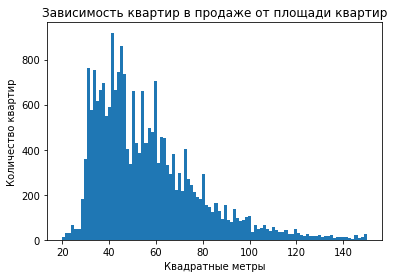

In [49]:

plt.hist(data['total_area'], bins=100, range=(12,900))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

# рассмотрим только data_filtered

plt.hist(data_filtered['total_area'], bins=100, range=(20,150))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Самое большое предложение квартир с площадью от 40 до 69 кв. метров с максимумом 52 кв. метров

In [50]:
# Анализ жилой площади
data['living_area'].describe()

count    23699.000000
mean        31.690930
std         23.109666
min          0.000000
25%         17.800000
50%         29.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

In [51]:
# Анализ жилой площади data_filtered
data_filtered['living_area'].describe()

count    22645.000000
mean        30.138356
std         18.088031
min          0.000000
25%         17.800000
50%         29.000000
75%         40.000000
max        147.200000
Name: living_area, dtype: float64

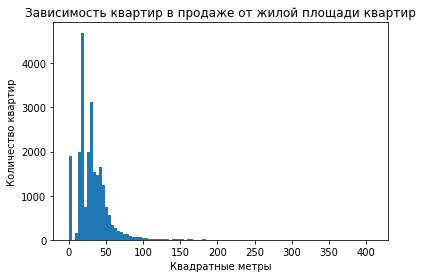

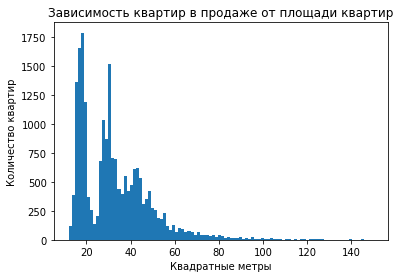

In [52]:
plt.hist(data['living_area'], bins=100, range=(0,409))
plt.title('Зависимость квартир в продаже от жилой площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

# рассмотрим только data_filtered

plt.hist(data_filtered['living_area'], bins=100, range=(12,150))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Самое большое предложение квартир с жилой площадью от 17 до 41 кв. метров с максимумом 29 кв. метров. При этом на гистограмме видны 2 пика - на показателях примерно 17 кв. метров и 30 кв. метров.

In [53]:
# Анализ площади кухни
data['kitchen_area'].describe()

count    23699.000000
mean         9.553814
std          6.420973
min          0.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

In [54]:
# Анализ площади кухни data_filtered
data_filtered['kitchen_area'].describe()

count    22645.000000
mean         9.138240
std          4.944464
min          0.000000
25%          6.300000
50%          8.800000
75%         11.000000
max         35.000000
Name: kitchen_area, dtype: float64

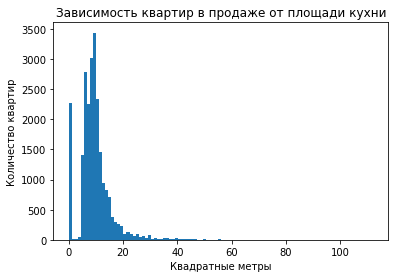

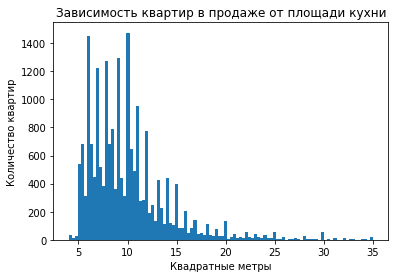

In [55]:
plt.hist(data['kitchen_area'], bins=100, range=(0,112))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

# рассмотрим только data_filtered

plt.hist(data_filtered['kitchen_area'], bins=100, range=(4, 35))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [56]:
# заодно рассмотрим только те предложения, где кухня есть
data[(data['kitchen_area']>0)].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day,month,year,distance_city_center
count,21421.000000,2.142100e+04,21421.000000,21421.000000,21421.000000,21421.000000,21421.000000,21421.000000,21421.000000,21421.000000,...,21421.000000,7389.000000,21421.00000,8266.000000,18443.000000,2.142100e+04,21421.000000,21421.000000,21421.000000,16617.000000
mean,10.045749,6.544027e+06,60.749885,2.095934,2.699013,10.594697,33.934381,5.859064,10.569807,0.624387,...,0.473741,488.254297,0.59549,518.256956,185.570081,9.928247e+04,2.550161,6.416974,2017.359554,14.209605
std,5.667125,9.726604e+06,35.031758,1.062910,0.249255,6.537799,22.239602,4.835933,5.905438,0.977330,...,0.749618,338.729048,0.88814,277.308315,222.394288,4.826048e+04,1.783959,3.466712,1.046998,8.653250
min,0.000000,1.219000e+04,14.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.00000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.500000e+06,40.600000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,...,0.000000,287.000000,0.00000,294.000000,45.000000,7.674944e+04,1.000000,3.000000,2017.000000,9.000000
50%,10.000000,4.700000e+06,52.500000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,453.000000,0.00000,503.000000,102.000000,9.500000e+04,2.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,15.000000,42.200000,8.000000,12.000000,1.000000,...,1.000000,611.000000,1.00000,730.000000,239.000000,1.140000e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,4.200000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.00000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


Самое большое предложение квартир с площадью кухни от 6.3 до 11.4 кв. метров с максимумом 9 кв. метров. Анализ среза данных только по квартирам с кухней значительно не изменил данные.

In [57]:
# Анализ цены
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [58]:
# Анализ цены data_filtered
data_filtered['last_price'].describe()

count    2.264500e+04
mean     5.555542e+06
std      3.590160e+06
min      5.000000e+05
25%      3.400000e+06
50%      4.599000e+06
75%      6.500000e+06
max      2.700000e+07
Name: last_price, dtype: float64

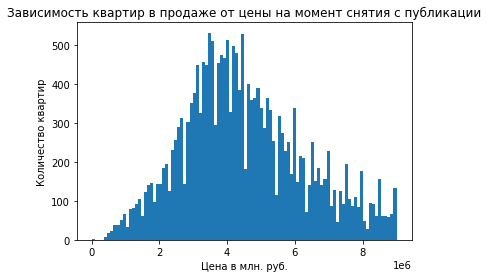

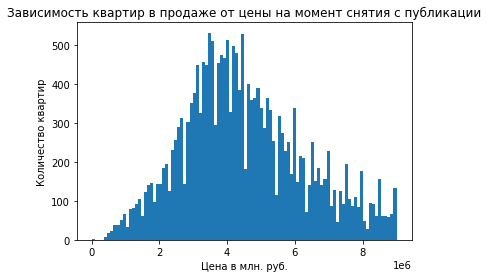

In [59]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

# Анализ цены data_filtered

plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Количество квартир')
plt.show()

Наиболее частотны объявления с проставленной стоимостью 3,8 - 4,2 млн.

In [60]:
# Анализ количества комнат
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [61]:
# Анализ количества комнат data_filtered
data_filtered['rooms'].describe()

count    22645.000000
mean         2.030073
std          0.963990
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

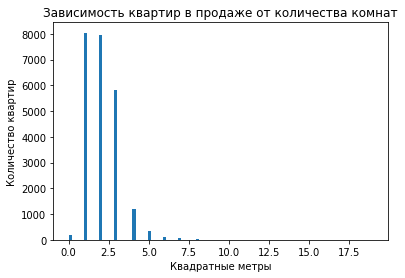

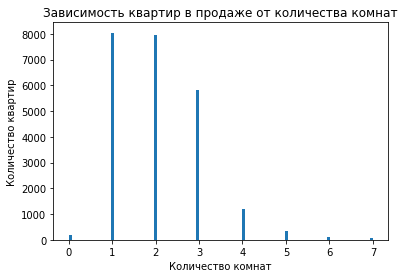

In [62]:
plt.hist(data['rooms'], bins=100, range=(0,19))
plt.title('Зависимость квартир в продаже от количества комнат')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

# рассмотрим только data_filtered

plt.hist(data['rooms'], bins=100, range=(0,7))
plt.title('Зависимость квартир в продаже от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()


Среди предложений больше всего однокомнатных квартир, чуть меньше двухкомнатных, а с увеличением количества комнат количество предложений уменьшается

In [63]:
# Анализ высоты потолков
data['ceiling_height'].describe()

count    23699.000000
mean         2.698721
std          0.253208
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

In [64]:
# Анализ высоты потолков data_filtered
data_filtered['ceiling_height'].describe()

count    22645.000000
mean         2.684859
std          0.193102
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

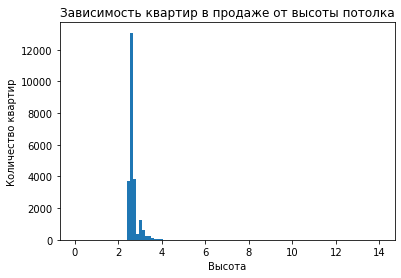

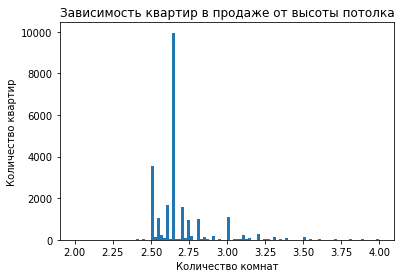

In [65]:
plt.hist(data['ceiling_height'], bins=100, range=(0,14))
plt.title('Зависимость квартир в продаже от высоты потолка')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()

# рассмотрим только data_filtered
plt.hist(data['ceiling_height'], bins=100, range=(2,4))
plt.title('Зависимость квартир в продаже от высоты потолка')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Самое большое предложение квартир с высотой потолка от 2.6 до 2.7 метров с максимумом 2.65 кв. метров (на втором месте по популярности 2.5 метров).

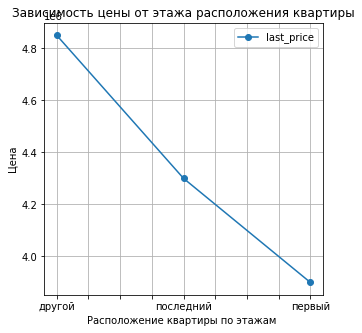

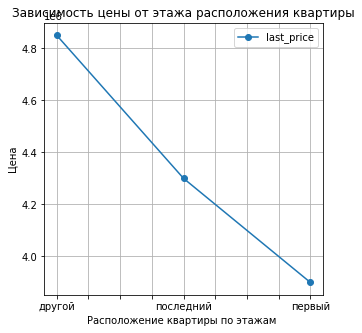

In [66]:
# Анализ типа этажа квартиры
(
    data.pivot_table(index='type_floor', values='last_price', aggfunc='median').sort_values(by='last_price', 
    ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()


# Анализ типа этажа квартиры data_filtered
(
    data.pivot_table(index='type_floor', values='last_price', aggfunc='median').sort_values(by='last_price', 
    ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

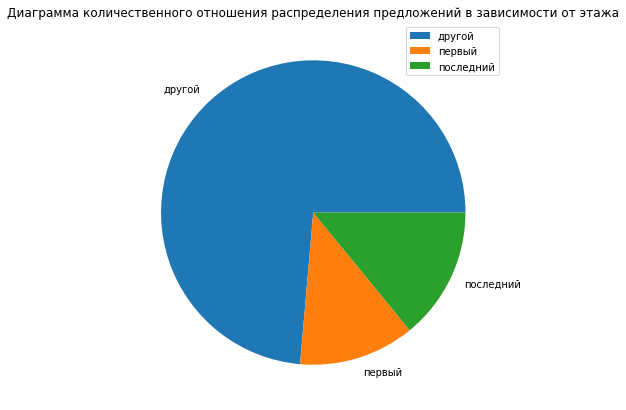

In [67]:
data.pivot_table(index='type_floor',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', 
            title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()


Общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, при это стоимость таких объектов дешевле, чем на других этажах.

In [68]:
# Анализ количества этажей в доме
data['floors_total'].describe()

count    23699.000000
mean        10.681759
std          6.599383
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [69]:
# Анализ количества этажей в доме data_filtered
data_filtered['floors_total'].describe()

count    22645.000000
mean        10.680415
std          6.539656
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

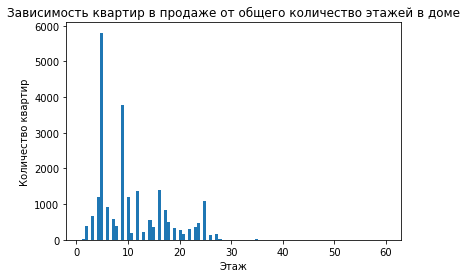

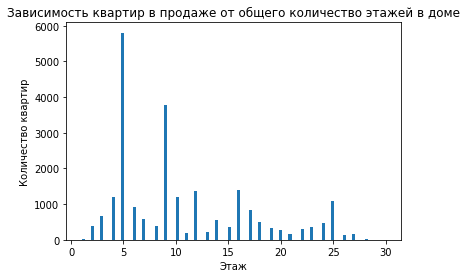

In [70]:
plt.hist(data['floors_total'], bins=100, range=(1,60))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

# рассмотрим только количество до 30

plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Больше всего предложений о продаже в пятиэтажных домах,  на втором месте - девятиэтажные.

In [71]:
# Анализ расстояния до центра города в метрах
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [72]:
# Анализ расстояния до центра города в метрах data_filtered
data_filtered['city_centers_nearest'].describe()

count    17266.000000
mean     14450.217711
std       8570.458197
min        208.000000
25%       9760.000000
50%      13246.000000
75%      16419.000000
max      65952.000000
Name: city_centers_nearest, dtype: float64

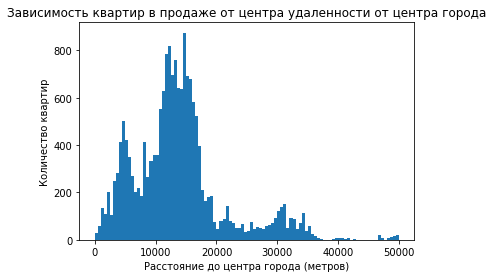

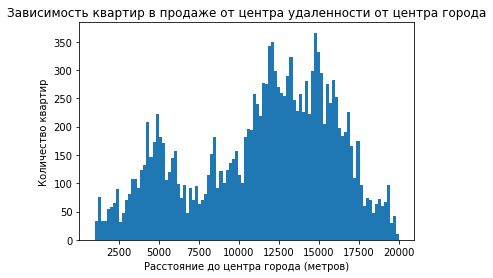

In [73]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,50000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Количество квартир')
plt.show()

# рассмотрим только data_filtered

plt.hist(data['city_centers_nearest'], bins=100, range=(1000,20000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Количество квартир')
plt.show()

Больше всего предложений о продаже в районах на окраинах города (на расстоянии 12000 -15000 метров от центра)), на втором месте -  дома на расстоянии в 5000 метров от центра города.

In [74]:
# Анализ расстояния до парков в метрах
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [75]:
# Анализ расстояния до парков в метрах data_filtered
data_filtered['parks_nearest'].describe()

count    7542.000000
mean      493.303766
std       339.800272
min         1.000000
25%       290.250000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

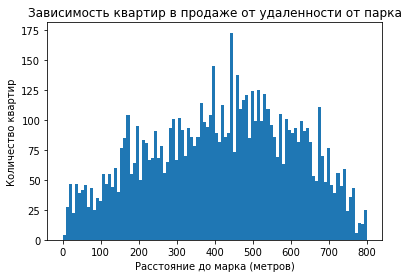

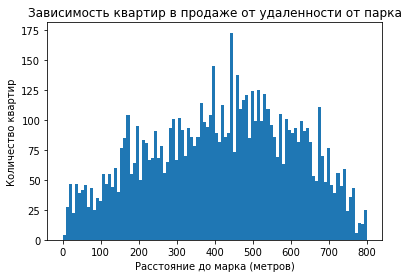

In [76]:
plt.hist(data['parks_nearest'], bins=100, range=(0,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Количество квартир')
plt.show()

#рассмотрим только data_filtered

plt.hist(data['parks_nearest'], bins=100, range=(0,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Количество квартир')
plt.show()

Самое большое предложение квартир на расстоянии 455 м (от 288 до 612 м), но этот показатель не влияет значительно на количество предложений.

Выводы:

-Самое большое предложение квартир с площадью от 40 до 69 кв. метров с максимумом 52 кв. метров.

-Самое большое предложение квартир с жилой площадью от 17 до 41 кв. метров с максимумом 29 кв. метров. При этом на гистограмме видны 2 пика - на показателях примерно 17 кв. метров и 30 кв. метров.

-Самое большое предложение квартир с площадью кухни от 6.3 до 11.4 кв. метров с максимумом 9 кв. метров. 

-Наиболее частотны объявления с проставленной стоимостью 3,8 - 4,2 млн.

-Среди предложений больше всего однокомнатных квартир, чуть меньше двухкомнатных, а с увеличением количества комнат количество предложений уменьшается.

-Общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, при это стоимость таких объектов дешевле, чем на других этажах.

-Больше всего предложений о продаже в пятиэтажных домах, на втором месте - девятиэтажные.

-Больше всего предложений о продаже в районах на окраинах города (на расстоянии 12000 -15000 метров от центра)), на втором месте - дома на расстоянии в 5000 метров от центра города.

-Самое большое предложение квартир без указания информации о ближайших парках (на слишком большом удалении от них). Для квартир с указанной информации об этом: наиболее частотно расстояние 455 м (от 288 до 612 м) от парка, но этот показатель не влияет значительно на количество предложений.

#### check gap

In [77]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [78]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,699.00","23,699.00","23,699.00","20,518.00","23,699.00","23,699.00","23,699.00","23,699.00","23,699.00"
min,0.00,12.00,1.00,1.00,"12,190.00",0.00,0.00,1.00,1.00
max,19.00,900.00,14.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,650,000.00",29.00,9.00,4.00,9.00


In [79]:
# check

(
    data_filtered[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,645.00","22,645.00","22,645.00","19,651.00","22,645.00","22,645.00","22,645.00","22,645.00","22,645.00"
min,1.00,20.00,2.00,1.00,"500,000.00",0.00,0.00,1.00,1.00
max,7.00,200.00,4.00,"1,100.00","27,000,000.00",147.20,35.00,27.00,29.00
median,2.00,51.20,2.65,93.00,"4,599,000.00",29.00,8.80,4.00,9.00


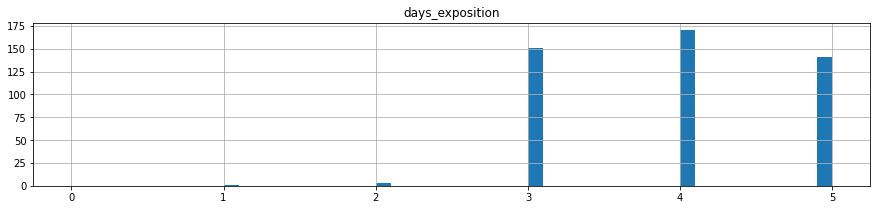

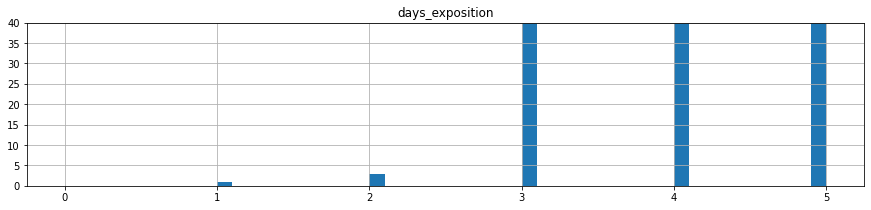

In [80]:
# check
data_filtered.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data_filtered.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [81]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [82]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


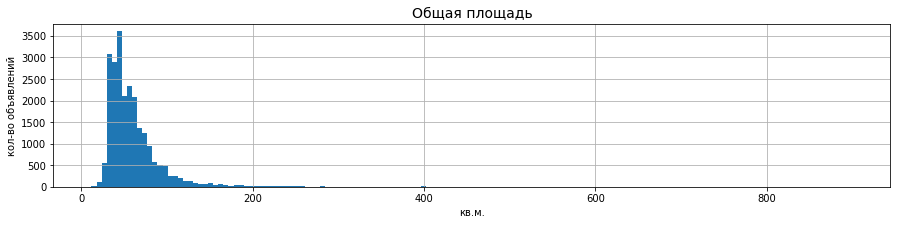

In [83]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

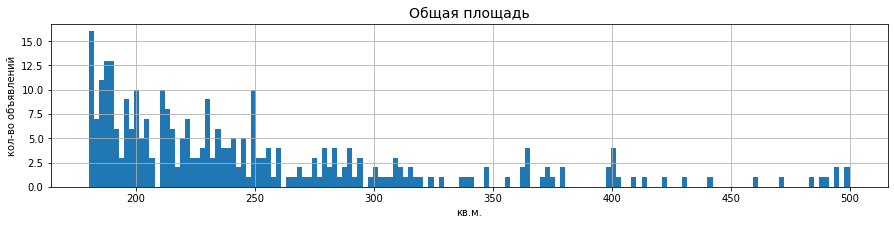

In [84]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

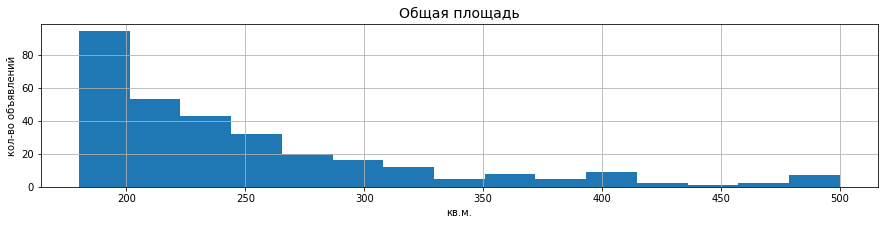

In [85]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

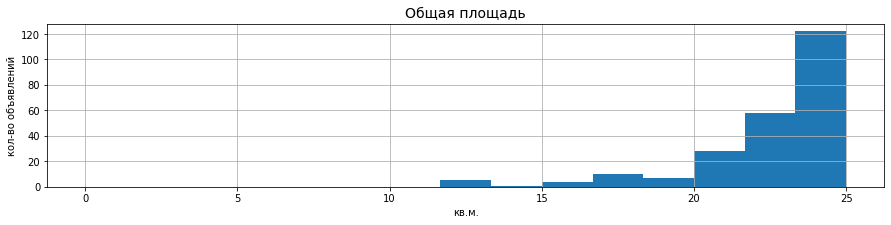

In [86]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

In [87]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,3.00,"562,188.00",0.00,0.00,1.00,2.00
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",0.00,0.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",29.00,9.00,4.00,9.00
0.99,5.00,197.21,3.60,"1,068.66","36,000,000.00",115.01,35.00,23.00,26.00
0.9988,8.00,380.00,4.43,"1,369.90","124,772,448.00",213.81,57.21,26.00,35.00


#### Изучите, как быстро продавались квартиры

In [88]:
print(data['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


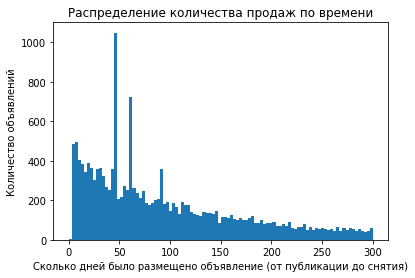

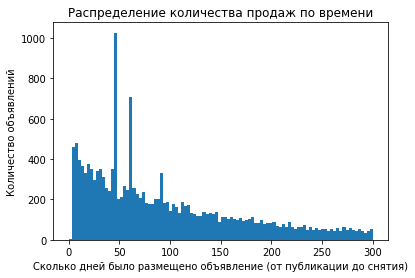

In [89]:
plt.hist(data['days_exposition'], bins=100, range=(0,300))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

plt.hist(data_filtered['days_exposition'], bins=100, range=(0,300))
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()


Среднее значение - 180 дней, при этом медианное значение - 95 дня, и оно более точно характеризует среднее время продажи, так как не зависит от выбросов. Таким образом, продажа квартиры в среднем занимает 3 месяца. Пики на графике соответствуют 45, 60 и 90 дням - таковы сроки публикации объявлений на платформе. Быстрыми продажами можно считать продажи состоявшиеся за 1,5 месяца (в первом квартиле), а необычно долгие продажи - после 8 месяцев и более (после 3 квартиля).

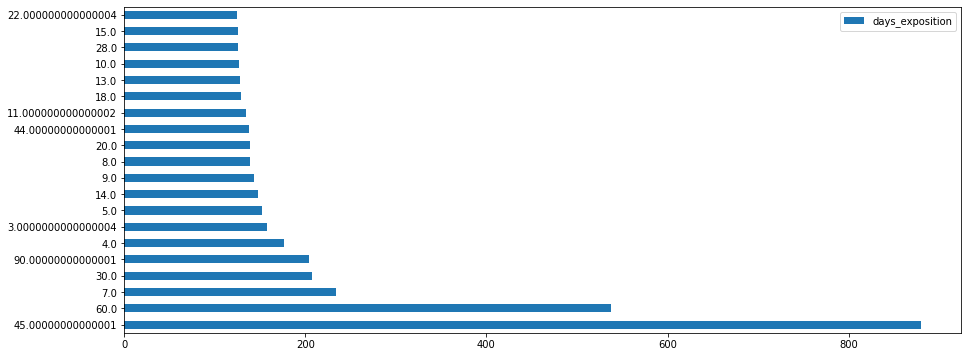

In [90]:
# check
# Моды на сырых данных

try:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

####  Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.

In [91]:
# рассмотрим корреляцию
# print(data.pivot_table(index='total_images', values=['last_price','total_area','living_area','kitchen_area','rooms','day','month','year']).corr())

In [92]:
print(data_filtered['last_price'].corr(data_filtered['total_area']))

0.7776464106791011


In [93]:
print(data_filtered['last_price'].corr(data_filtered['kitchen_area']))

0.45539051981722795


In [94]:
print(data_filtered['last_price'].corr(data_filtered['living_area']))

0.5476004258704099


In [95]:
print(data_filtered['last_price'].corr(data_filtered['rooms']))

0.497074408018158


In [96]:
print(data_filtered['last_price'].corr(data_filtered['year']))

-0.017528192174048395


Заметная теснота корреляционной связи наблюдается только между стоимостью и площадью объекта. Построим графики, которые покажут зависимость цены от указанных выше параметров. 

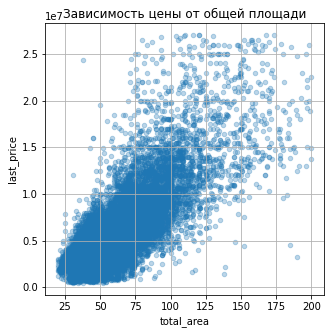

In [97]:
data_filtered.plot(x='total_area', y='last_price', kind='scatter',grid=True, style='o', figsize=(5, 5), alpha=0.3) 
plt.title('Зависимость цены от общей площади')
plt.show()

На графике действительно наблюдается корреляция между стоимостью и площадью объекта.

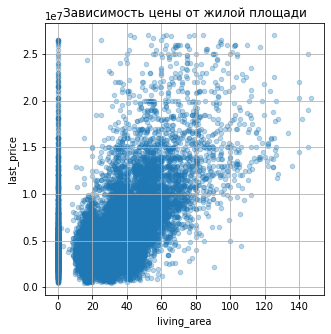

In [98]:
data_filtered.plot(x='living_area', y='last_price', kind='scatter',grid=True, style='o', figsize=(5, 5), alpha=0.3) 
plt.title('Зависимость цены от жилой площади')
plt.show()

На графике наблюдается корреляция между стоимостью и жилой площадью объекта.

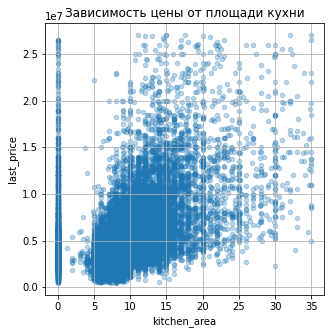

In [99]:
data_filtered.plot(x='kitchen_area', y='last_price', kind='scatter',grid=True, style='o', figsize=(5, 5), alpha=0.3) 
plt.title('Зависимость цены от площади кухни')
plt.show()

На графике наблюдается корреляция между стоимостью и площадью кухни.

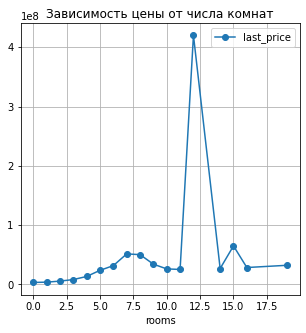

In [100]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()

Чем больше комнат, тем больше цена, но выбросы влияют на корреляцию.

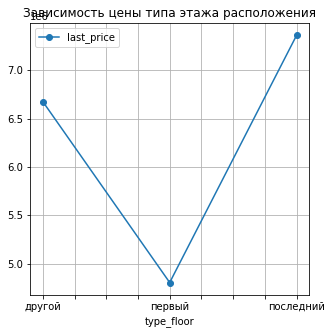

In [101]:
(
    data.pivot_table(index='type_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

Самые дешевые квартиры - на первом этаже, а самые дорогие - на последнем.

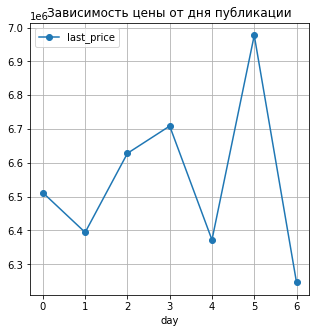

In [102]:
(
    data.pivot_table(index='day', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

Дороже всех других квартиры размещенные в субботу, а дешевле всех - в воскресенье.

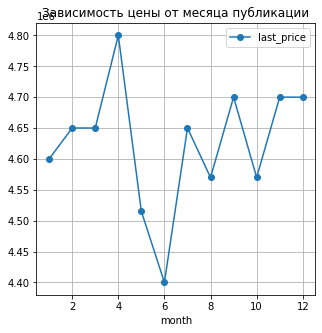

In [103]:
(
    data.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

В объявлениях, размещенных в июне цены достигают минимума, а пик стоимости - апрель.

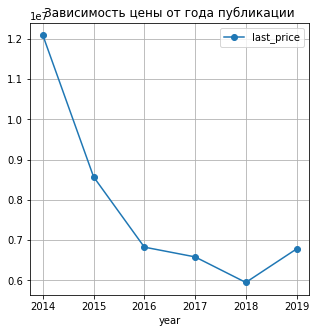

In [104]:
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

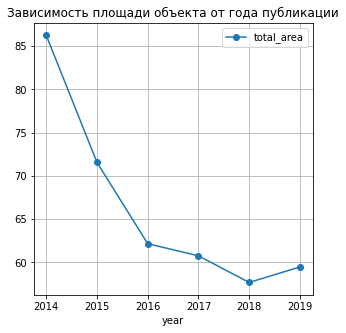

In [105]:
(
    data.pivot_table(index='year', values='total_area')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость площади объекта от года публикации')
plt.show()

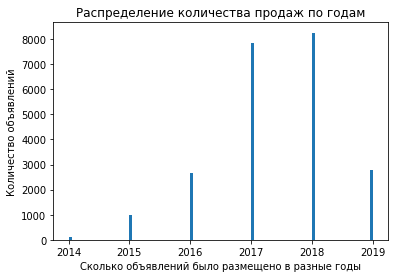

In [106]:
plt.hist(data_filtered['year'], bins=100)
plt.title('Распределение количества продаж по годам')
plt.xlabel('Сколько объявлений было размещено в разные годы')
plt.ylabel('Количество объявлений')
plt.show()

Цены уменьшались с 2014 года по 2018, но в 2019 произошло увеличение стоимости, что полностью совпадает с аналогичными изменениями в общей площади. Количество объявлений на сайте увеличивалось с 2014 по 2017, далее отмечено уменьшение количества объявлений в 2018 и 2019.

In [107]:
# отфильтруем слишком дешевые и дорогие объекты
#good_data = data.query('3.400000e+06 <= last_price <= 6.800000e+06')
#print(good_data.pivot_table(index='total_images', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr())

Если отфильтровать дорогие и дешевые квартиры, то можно отметить, что фактор, влияющий на стоимость - общая площадь объекта. Связь с остальными параметрами не столь сильно выражена.

Выводы:

Чем больше общая площадь, тем выше стоимость.

Квартиры на первом этаже значительно дешевле, дороже последний этаж. 

Цены уменьшались с 2014 года по 2018, но в 2019 произошло увеличение стоимости, что полностью совпадает с аналогичными изменениями в общей площади. Количество объявлений на сайте увеличивалось с 2014 по 2017, далее отмечено уменьшение количества объявлений в 2018 и 2019.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [108]:
price_top10 = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_top10.columns = ['count']
price_top10 = price_top10.sort_values(by='count', ascending=False).head(10)
price_top10['price_meter'] = data.pivot_table(index='locality_name', values='price_meter').round(2)
price_top10.sort_values(by='price_meter', ascending=False)

,count,price_meter
locality_name,,
санкт-петербург,15721,114849.01
пушкин,369,103125.82
кудрово,472,95324.93
парголово,327,90175.91
мурино,590,86087.51
шушары,440,78677.36
колпино,338,75424.58
гатчина,307,68746.15
всеволожск,398,68654.47


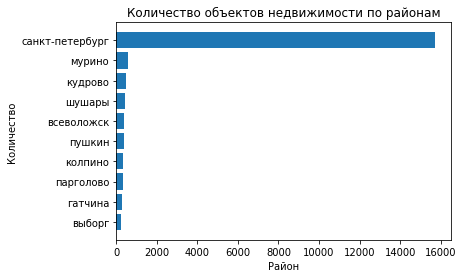

In [109]:
price_top10 = price_top10.sort_values(by='count', ascending=True) 
plt.barh(price_top10.index, price_top10['count'])
plt.title('Количество объектов недвижимости по районам')
plt.xlabel('Район')
plt.ylabel('Количество')
plt.show()

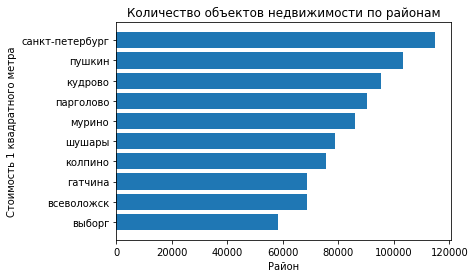

In [110]:
price_top10 = price_top10.sort_values(by='price_meter', ascending=True) 
plt.barh(price_top10.index, price_top10['price_meter']) 
plt.title('Количество объектов недвижимости по районам')
plt.xlabel('Район')
plt.ylabel('Стоимость 1 квадратного метра')
plt.show()

Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге, на втором месте Пушкин, а потом районы рядом с городом.

#### Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра.

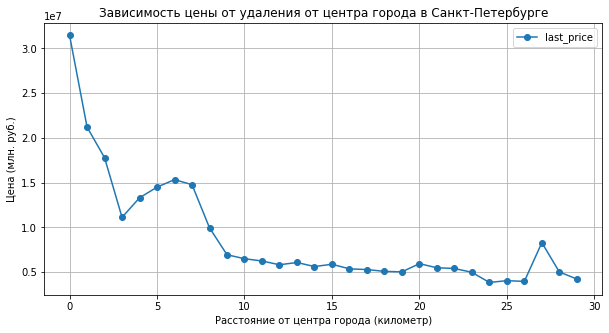

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
distance_city_center,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.112658e+07
4.0,1.330428e+07
5.0,1.449912e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.957717e+06


In [111]:
data.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', 
#           xlim=(0,15),
#           закомментировал твой код
          figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург')
data.query('locality_name == "санкт-петербург" and distance_city_center<10').pivot_table(values='last_price', 
        index='distance_city_center')

In [112]:
print(data.loc[data['distance_city_center'] == 27, 'locality_name'])

109            пушкин
140            пушкин
439            пушкин
556            пушкин
558      металлострой
             ...     
22503          пушкин
22544    красное село
22619          пушкин
23286    металлострой
23438          пушкин
Name: locality_name, Length: 104, dtype: object


In [113]:
print(data.query('locality_name == "санкт-петербург" and distance_city_center == 27'))

      total_images  last_price  total_area first_day_exposition  rooms  \
748             13  14350000.0        74.0           2017-11-28      2   
5961             6   2250000.0        32.0           2018-02-27      1   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
748             3.13             5         30.0      3         False  ...   
5961            2.65             2         16.5      2         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
748          1496.0               0.0            NaN            128.0   
5961            NaN               0.0            NaN            178.0   

     price_meter  day  month  year  type_floor  distance_city_center  
748    193918.92    1     11  2017      другой                  27.0  
5961    70312.50    1      2  2018   последний                  27.0  

[2 rows x 28 columns]


В пределах Санкт-Петербурга на расстоянии в 27 км только 2 записи, но одна из них стоимостью 14350000

Вывод

Самые дорогие квартиры - в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 6 километров, далее стоимость не зависит от расстояния. Пик на 27 км - это объявления в Пушкине.

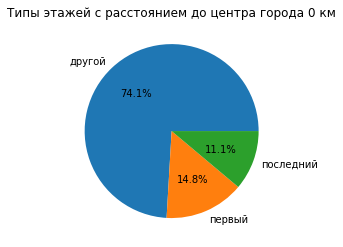

In [114]:
plt.pie(x=data.loc[data['distance_city_center'] == 0, 'type_floor'].value_counts(), labels=data.loc[data['distance_city_center'] == 0, 'type_floor'].unique(), autopct='%1.1f%%') 
plt.title('Типы этажей с расстоянием до центра города 0 км')
plt.show()


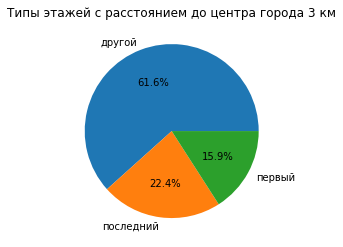

In [115]:
plt.pie(x=data.loc[data['distance_city_center'] == 3, 'type_floor'].value_counts(), labels=data.loc[data['distance_city_center'] == 3, 'type_floor'].unique(), autopct='%1.1f%%') 
plt.title('Типы этажей с расстоянием до центра города 3 км')
plt.show()


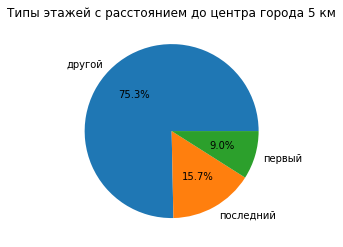

In [116]:
plt.pie(x=data.loc[data['distance_city_center'] == 5, 'type_floor'].value_counts(), labels=data.loc[data['distance_city_center'] == 3, 'type_floor'].unique(), autopct='%1.1f%%') 
plt.title('Типы этажей с расстоянием до центра города 5 км')
plt.show()

На расстоянии от центра в 3 км выше доля продающихся объектов недвжимости на последнем этаже

### Напишите общий вывод

Был выполнен проект по изучению архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  Была рассмотрена общая информацию о данных. Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных.

Далее была выполнена предобработка данных: изменено название столбца, заполнены пропуски в таблице, изменен тип данных, были сделаны выводы о причинах пропусков.

Были добавлены новые столбцы в таблицу для проведения следующего этапа с информацией о цене квадратного метра объекта с точностью до двух знаков после запятой, дне недели публикации объявления (0 — понедельник, 1 — вторник и так далее), месяце публикации объявления, в каком году опубликовано объявление, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние до центра города в целых километрах.

Был проведен исследовательский анализ данных. Так, в архиве отмечается большое предложение квартир с площадью от 40 до 69 кв. метров с максимумом 52 кв. метров. Большое всего квартир с жилой площадью от 17 до 41 кв. метров с максимумом 29 кв. метров. При этом на гистограмме видны 2 пика - на показателях примерно 17 кв. метров и 30 кв. метров. Площадь кухни чаще всего от 6.3 до 11.4 кв. метров с максимумом 9 кв. метров. Наиболее частотны объявления с проставленной стоимостью 3,8 - 4,2 млн. Общее количество предложений первого" и последнего этажа составляет чуть больше 25% от общего количества предложений, при это стоимость таких объектов дешевле, чем на других этажах. Больше всего предложений о продаже в пятиэтажных домах, на втором месте - девятиэтажные. Среди предложений больше всего однокомнатных квартир, чуть меньше двухкомнатных, а с увеличением количества комнат количество предложений уменьшается.Самое большое предложение квартир без указания информации о ближайших парках (на слишком большом удалении от них). Больше всего предложений о продаже в районах на окраинах города (на расстоянии 12000 -15000 метров от центра)), на втором месте - дома на расстоянии в 5000 метров от центра города. Для квартир с указанной информации об этом: наиболее частотно расстояние 455 м (от 288 до 612 м) от парка, но этот показатель не влияет значительно на количество предложений.

Изучено, как быстро продавались квартиры: среднее значение - 180 дней, при этом медианное значение - 95 дня, и оно более точно характеризует среднее время продажи, так как не зависит от выбросов. Таким образом, продажа квартиры в среднем занимает 3 месяца. Пики значений на графике соответствуют 45, 60 и 90 дням - таковы сроки публикации объявлений на платформе, но причиной подобных пиков могут быть и автоматические обновления объявлений агентствами через определенные промежутки времени. Быстрыми продажами можно считать продажи состоявшиеся за 1,5 месяца (в первом квартиле), а необычно долгие продажи - после 8 месяцев и более (после 3 квартиля).

Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта: чем больше общая площадь, тем выше стоимость. Квартиры на первом этаже значительно дешевле, самые дорогие - на последнем этаже. Цены уменьшались с 2014 года по 2018, но в 2019 произошло увеличение стоимости, что полностью совпадает с аналогичными изменениями в общей площади объектов в указанный временной промежуток. При этом количество объявлений на сайте увеличивалось с 2014 по 2017, далее отмечено уменьшение количества объявлений в 2018 и 2019 годах.

Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: наибольшая средняя стоимость квадратного метра в Санкт-Петербурге, на втором месте Пушкин, а потом районы рядом с городом (Кудрово (в рамках данного исследования в этой категории указаны и объекты недвижимости из населенного пункта "деревня Кудрово" и район с новостройками), Парголово, Мурино).

Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга: самые дорогие квартиры находятся в центре города и их стоимость уменьшается c увеличением расстояния от центра города до 7 километров, далее стоимость не зависит от расстояния. Провал в стоимости объектов на расстоянии 3 км объясняется повышенным количеством объявлений с квартирами на более дешевых этажах. Пик стоимости на 27 км в Санкт-Петербурге можно обяъснить тем, что  в пределах Санкт-Петербурга на этом расстоянии продавалось только 2 объекта и один из них был стоимостью 14350000 рублей (выше средней стоимости и по отношению к объектам в черте города).

In [121]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['last_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')
# стайл и плот вместе не работают

,mean,count
locality_name,,
санкт-петербург,"8,062,507","15,721"
пушкин,"6,469,036",369
парголово,"4,488,075",327
кудрово,"4,358,688",472
шушары,"4,108,082",440
колпино,"3,964,021",338
всеволожск,"3,789,068",398
мурино,"3,678,462",590
гатчина,"3,488,337",307


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.